### Introduction to ```nreltest```

This notebook will introduce to you kernel multiple model comparison with relative fit testing.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import reltest
import reltest.util as util

### Example 1: Mean shift model comparison with Maximum Mean Discrepancy

#### Problem Setting

In this problem, we consider 3 mean shifted models with the reference distribution as $\mathcal{N}(0,1)$. In this case, we assume that only samples can be drawn. For the candidate models, we use as Model 1 $\mathcal{N}(1,1)$, Model 2 $\mathcal{N}(2,1)$ and Model 3 $\mathcal{N}(3,1)$. Note that Model 1 is the closest and so the best.

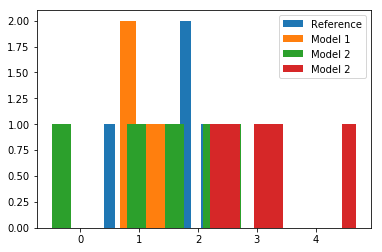

In [2]:
## Model 1.
def model_one(n_samples ,seed=5):
    with util.NumpySeedContext(seed):
        return np.random.randn(n_samples,1) + 1

## Model 2.
def model_two(n_samples ,seed=6):
    with util.NumpySeedContext(seed):
        return np.random.randn(n_samples,1) + 2

## Model 3.
def model_thr(n_samples ,seed=7):
    with util.NumpySeedContext(seed):
        return np.random.randn(n_samples,1) + 3
    
## Reference.
def reference(n_samples ,seed=0):
    with util.NumpySeedContext(seed):
        return np.random.randn(n_samples,1)

## Number of samples
n_samples = 5

modelone = model_one(n_samples)
modeltwo = model_two(n_samples)
modelthr = model_thr(n_samples)

ref = reference(n_samples)
models = [modelone, modeltwo, modelthr]

plt.hist(ref, label="Reference")
plt.hist(modelone, label="Model 1")
plt.hist(modeltwo, label="Model 2")
plt.hist(modelthr, label="Model 2")
plt.legend()

#### The Maximum Mean Discrepancy

The Maximum Mean Discrepancy with the Gaussian Kernel. The function ```med_heuristic``` calculates the median heuristic for the given model and reference. More elaborate strategies can be considered here instead.

In [3]:
med = reltest.mmd.med_heuristic(models, ref)
kernel = reltest.kernel.KGauss(med)
mmd = reltest.mmd.MMD_U(kernel)

#### The Test

The test is performed.

The test outputs a dictionary of the ```'ind_sel'``` indicating the selected model.
The p-values is ```'pvals'```.

In [4]:
mctest = reltest.mctest.MCTestPSI(ref, alpha=0.05)
mctest.perform_tests(models, mmd)

{'ind_sel': 1,
 'h0_rejected': array([False, False,  True]),
 'pvals': array([0.31626035, 1.        , 0.00110983]),
 'time_secs': 0.007788181304931641}

Note that the test does not use $p$-values to reject the test. See disclaimer.